A notebook to visualize some of the test systems in the C++ test code in `Code/GraphMol/RGroupDecomposition/testRGroupDecomp.cpp`

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition, RGroupDecompositionParameters, \
   RGroupMatching, RGroupScore, RGroupLabels, RGroupCoreAlignment
import pandas as pd
from rdkit.Chem import PandasTools
from collections import OrderedDict
from IPython.display import HTML
from rdkit import rdBase
from io import StringIO
from rdkit.Chem import Draw
rdBase.DisableLog("rdApp.debug")

In [2]:

def decomp(options):
    options.removeHydrogensPostMatch = True
    decomp = RGroupDecomposition(cores, options)
    for mol in mols:
        decomp.Add(mol)
    decomp.Process()
    cols = decomp.GetRGroupsAsColumns()
    return cols

def show_decomp(cols, input_core=None):
    if input_core:
        if isinstance(input_core, list):
            cols['Input core'] = input_core
        else:
            cols['Input core'] = [input_core] * len(mols)
    cols['Mol'] = mols
    df = pd.DataFrame(cols);
    PandasTools.ChangeMoleculeRendering(df)
    return HTML(df.to_html())

# for when we can't display structures ("non-ring aromatic")
def show_decomp_smiles(cols):
    cols['mol'] = mols
    for c in cols:
        cols[c] = ['{}:{}'.format(c, Chem.MolToSmiles(m)) for m in cols[c]]
    df = pd.DataFrame(cols);
    PandasTools.ChangeMoleculeRendering(df)
    return HTML(df.to_html())

def print_rows(options):
    decomp = RGroupDecomposition(cores, options)
    for mol in mols:
        decomp.Add(mol)
    decomp.Process()
    rows = decomp.GetRGroupsAsRows()
    for i, r in enumerate(rows):
        labels = ['{}:{}'.format(l, Chem.MolToSmiles(r[l])) for l in r]
        print('"{}",'.format(' '.join(labels)))
    

### testSDFGRoupMultiCoreNoneShouldMatch

Cores, compounds and python code 

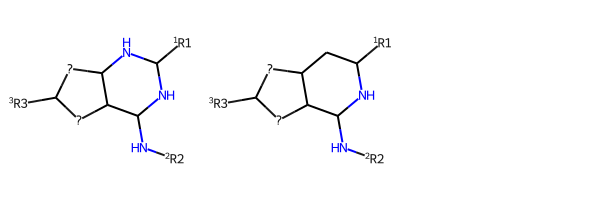

In [3]:
sdcores = """
Mrv1813 05061918272D          

 13 14  0  0  0  0            999 V2000
   -1.1505    0.0026    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1505   -0.8225    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360   -1.2350    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784   -0.8225    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784    0.0026    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360    0.4151    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9354    0.2575    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4202   -0.4099    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9354   -1.0775    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.9907   -1.2333    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360    1.2373    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784    1.6497    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -3.2452   -0.4098    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  6  1  1  0  0  0  0
  1  7  1  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  9  2  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 10  1  0  0  0  0
  5  6  1  0  0  0  0
  6 11  1  0  0  0  0
  7  8  1  0  0  0  0
  8 13  1  0  0  0  0
  8  9  1  0  0  0  0
 11 12  1  0  0  0  0
M  RGP  3  10   1  12   2  13   3
M  END
$$$$

  Mrv1813 05061918272D          

 13 14  0  0  0  0            999 V2000
    6.9524    0.1684    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9524   -0.6567    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.6668   -1.0692    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813   -0.6567    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813    0.1684    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.6668    0.5809    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1674    0.4233    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.6827   -0.2441    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1674   -0.9117    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    9.0935   -1.0675    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    7.6668    1.4031    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813    1.8155    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    4.8576   -0.2440    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  6  1  1  0  0  0  0
  1  7  1  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  9  2  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 10  1  0  0  0  0
  5  6  1  0  0  0  0
  6 11  1  0  0  0  0
  7  8  1  0  0  0  0
  8 13  1  0  0  0  0
  8  9  1  0  0  0  0
 11 12  1  0  0  0  0
M  RGP  3  10   1  12   2  13   3
M  END
$$$$)CTAB"""

supplier = Chem.SDMolSupplier()
supplier.SetData(sdcores)
cores = [x for x in supplier]
for core in cores:
    AllChem.Compute2DCoords(core)
Draw.MolsToGridImage(cores)

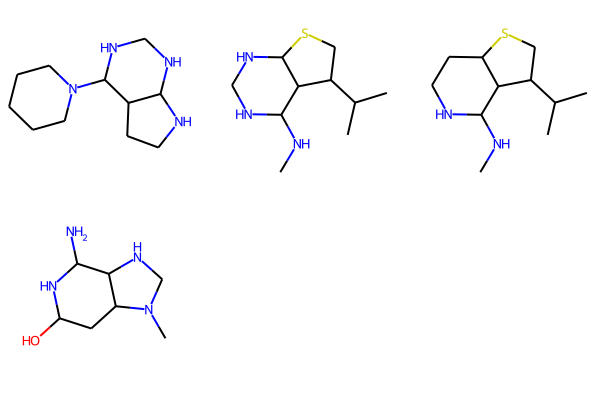

In [4]:
sdmols="""CTAB(
  Mrv1813 05061918322D          

 15 17  0  0  0  0            999 V2000
    0.1742    0.6899    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886    0.2774    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -0.5476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -0.9601    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -1.7851    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -2.1976    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -3.0226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -3.4351    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -3.0226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3249   -3.2775    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8099   -2.6101    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3249   -1.9426    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -2.1976    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -0.5476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403    0.2774    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1 15  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 14  1  0  0  0  0
  5  6  1  0  0  0  0
  5 13  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
  9 13  1  0  0  0  0
 10 11  1  0  0  0  0
 11 12  1  0  0  0  0
 12 13  1  0  0  0  0
 14 15  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 14 15  0  0  0  0            999 V2000
    6.4368    0.3002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -0.1123    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -0.9373    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4368   -1.3498    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.4368   -2.1748    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -2.5873    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0078   -2.1748    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2232   -2.4297    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    3.7383   -1.7623    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2232   -1.0949    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9683   -0.3102    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1613   -0.1387    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5203    0.3029    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.0078   -1.3498    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  7 14  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
 10 11  1  0  0  0  0
 10 14  1  0  0  0  0
 11 13  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 14 15  0  0  0  0            999 V2000
    0.8289   -7.9643    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144   -8.3768    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144   -9.2018    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8289   -9.6143    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8289  -10.4393    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144  -10.8518    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6000  -10.4393    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3847  -10.6942    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8696  -10.0268    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3847   -9.3593    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6396   -8.5747    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4466   -8.4032    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0876   -7.9616    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6000   -9.6143    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  7 14  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
 10 11  1  0  0  0  0
 10 14  1  0  0  0  0
 11 13  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 12 13  0  0  0  0            999 V2000
    5.3295   -8.1871    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5844   -7.4025    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0995   -6.7351    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5844   -6.0676    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.3690   -6.3226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -5.9101    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -5.0851    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.7980   -6.3226    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.7980   -7.1476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.5124   -7.5601    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -7.5601    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.3690   -7.1476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  2 12  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  5 12  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  6  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
  9 11  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$)CTAB"""
supplier = Chem.SDMolSupplier()
supplier.SetData(sdmols)
mols = [x for x in supplier]
for mol in mols:
    AllChem.Compute2DCoords(mol)
Draw.MolsToGridImage(mols)

,Core,R1,R2,R4,R5,R6,Input core,Mol
0,,,,,,,,
1,,,,,,,,
2,,,,,,,,
3,,,,,,,,

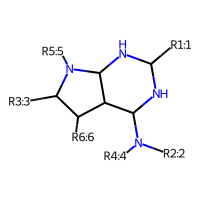
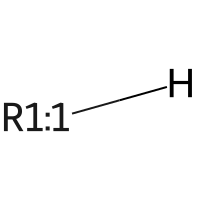
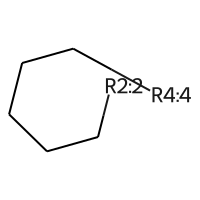
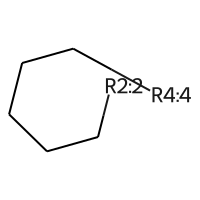
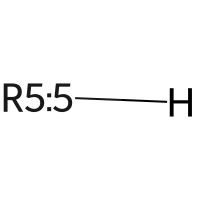
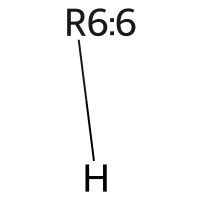
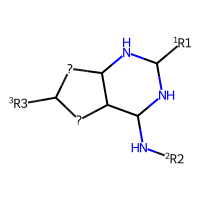
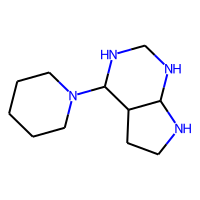
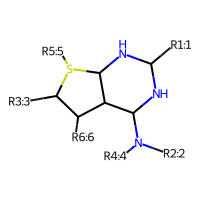
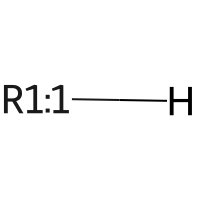
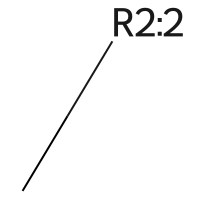
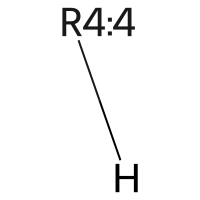
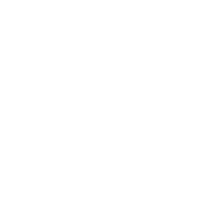
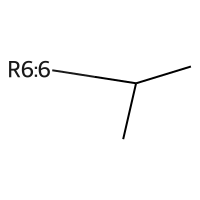
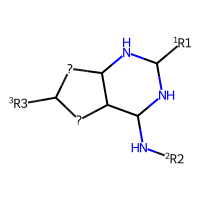
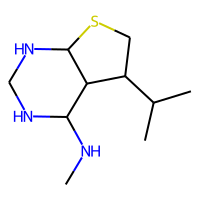
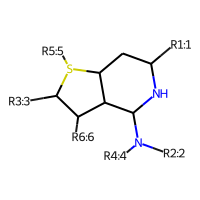
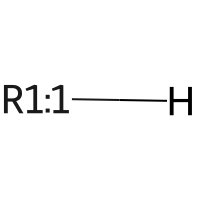
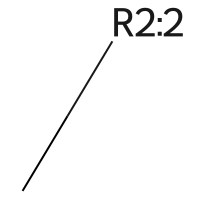
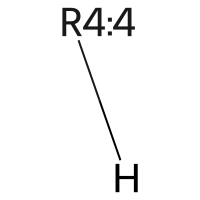
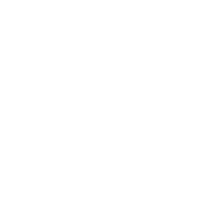
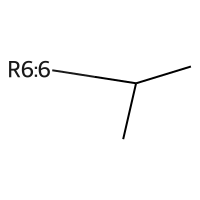
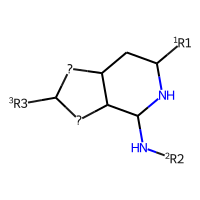
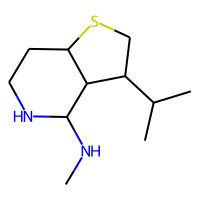
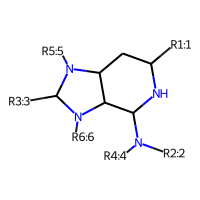
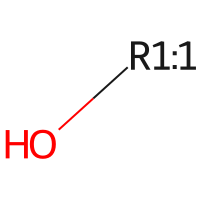
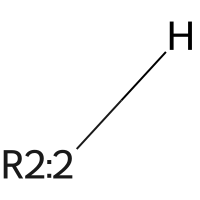
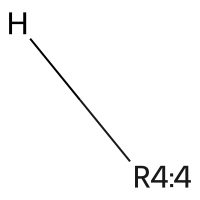
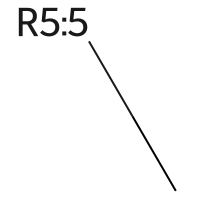
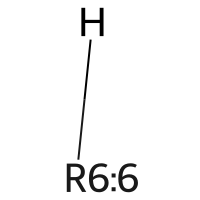
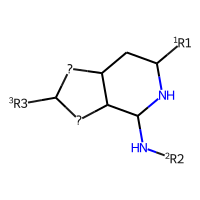
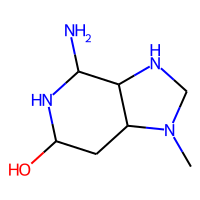

In [5]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = False
options.removeHydrogensPostMatch = True
cols = decomp(options)
show_decomp(cols, [cores[0], cores[0], cores[1], cores[1]])

In [6]:
print_rows(options)

"Core:N1C(N([*:2])[*:4])C2C([*:6])C([*:3])N([*:5])C2NC1[*:1] R1:[H][*:1] R2:C(CC[*:2])CC[*:4] R4:C(CC[*:2])CC[*:4] R5:[H][*:5] R6:[H][*:6]",
"Core:N1C(N([*:2])[*:4])C2C([*:6])C([*:3])S([*:5])C2NC1[*:1] R1:[H][*:1] R2:C[*:2] R4:[H][*:4] R6:CC(C)[*:6]",
"Core:C1C2C(C([*:6])C([*:3])S2[*:5])C(N([*:2])[*:4])NC1[*:1] R1:[H][*:1] R2:C[*:2] R4:[H][*:4] R6:CC(C)[*:6]",
"Core:C1C2C(C(N([*:2])[*:4])NC1[*:1])N([*:6])C([*:3])N2[*:5] R1:O[*:1] R2:[H][*:2] R4:[H][*:4] R5:C[*:5] R6:[H][*:6]",


### testMultiCorePreLabelled

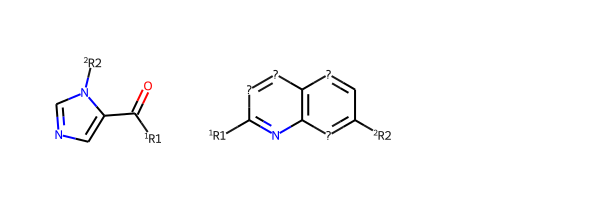

In [7]:
sdcores = """CTAB(
     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    1.1100   -1.3431    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5225   -0.6286    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9705   -0.0156    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2168   -0.3511    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.3029   -1.1716    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1419    0.7914    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5289    1.3431    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.9266    1.0463    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -0.4976    0.0613    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  1  0
  1  5  2  0
  3  6  1  0
  6  7  2  0
  6  8  1  0
  4  9  1  0
M  RGP  2   8   1   9   2
V    8 *
V    9 *
M  END
$$$$

     RDKit          2D

 12 13  0  0  0  0  0  0  0  0999 V2000
   -6.5623    0.3977    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -5.8478   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1333    0.3977    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4188   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4188   -0.8397    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1333   -1.2522    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -5.8478   -0.8397    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7044   -1.2522    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7044    0.3977    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9899   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9899   -0.8397    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2754    0.3978    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  2  3  2  0
  2  7  1  0
  9 10  2  0
 10 11  1  0
  8 11  2  0
  8  5  1  0
  4  9  1  0
 10 12  1  0
  1  2  1  0
M  RGP  2   1   2  12   1
V    1 *
V   12 *
M  END
$$$$
)CTAB"""

supplier = Chem.SDMolSupplier()
supplier.SetData(sdcores)
cores = [x for x in supplier]
for core in cores:
    AllChem.Compute2DCoords(core)
Draw.MolsToGridImage(cores)

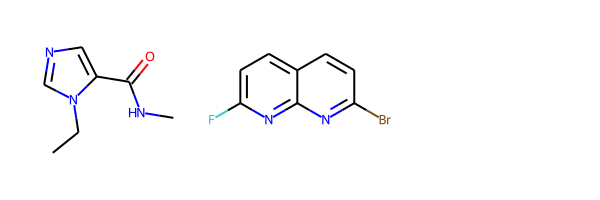

In [8]:
smiles = ["CNC(=O)C1=CN=CN1CC", "Fc1ccc2ccc(Br)nc2n1"]
mols = [Chem.MolFromSmiles(s) for s in smiles]
Draw.MolsToGridImage(mols)

,Core,R1,R2,Input core,Mol
0,,,,,
1,,,,,

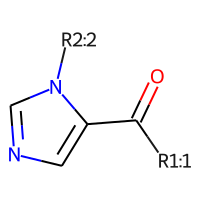
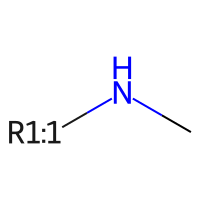
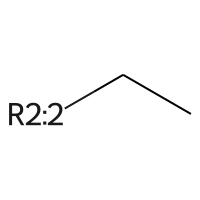
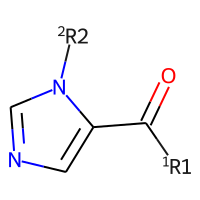
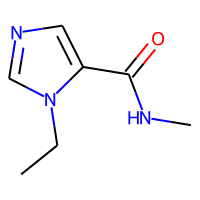
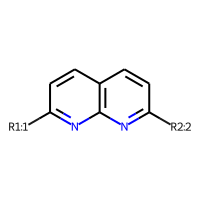
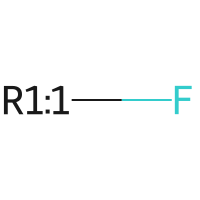
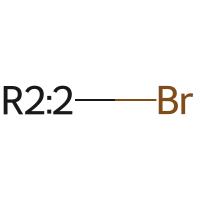
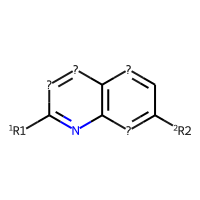
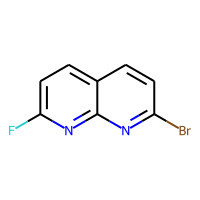

In [9]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols = decomp(options)
show_decomp(cols, cores)

In [10]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


,Core,R1,R2,Input core,Mol
0,,,,,
1,,,,,

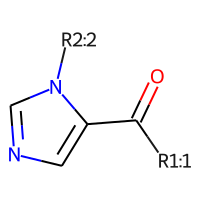
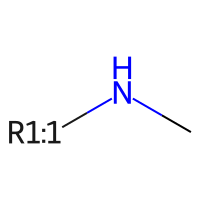
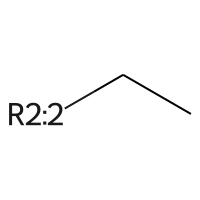
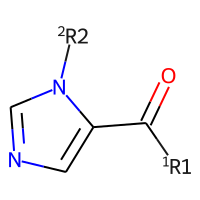
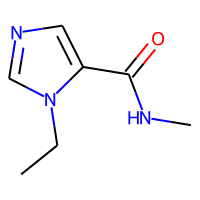
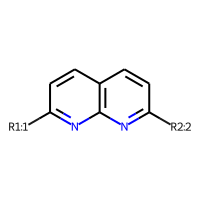
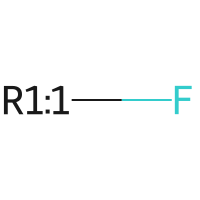
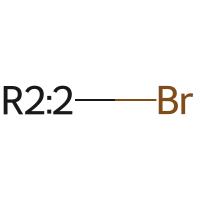
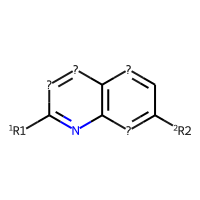
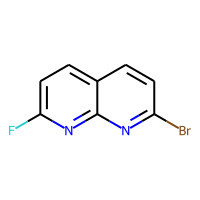

In [11]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.MDLRGroupLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, cores)

In [12]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


,Core,R1,R2,Input core,Mol
0,,,,,
1,,,,,

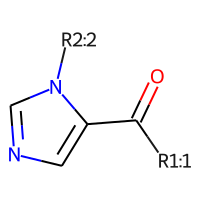
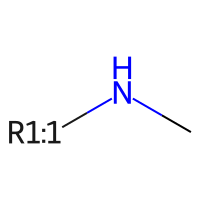
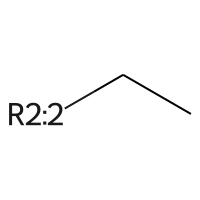
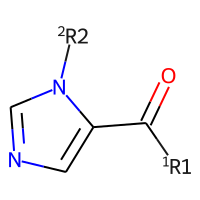
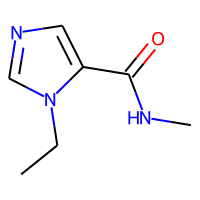
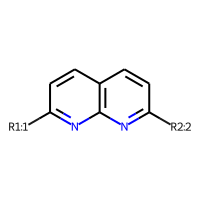
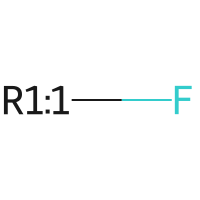
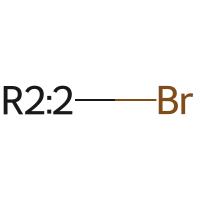
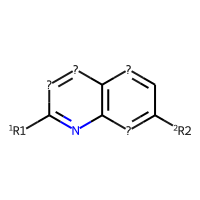
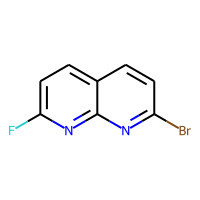

In [13]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.NoAlignment
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, cores)

In [14]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


,Core,R1,R2,Input core,Mol
0,,,,,
1,,,,,

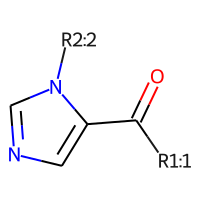
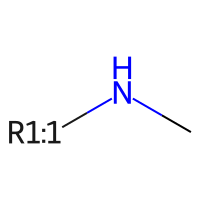
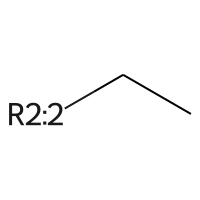
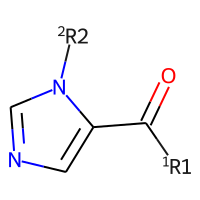
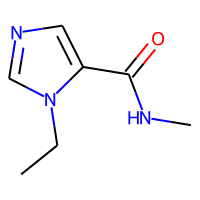
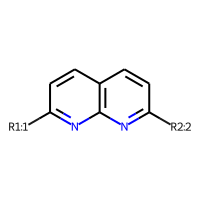
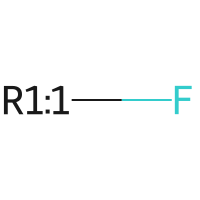
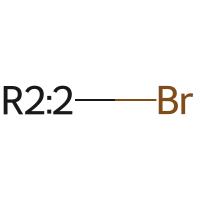
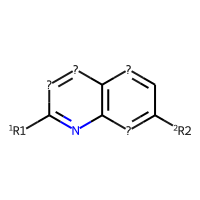
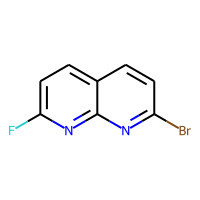

In [15]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.MDLRGroupLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.NoAlignment
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, cores)

In [16]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:2])nc2nc1[*:1] R1:F[*:1] R2:Br[*:2]",


In [17]:
for core in cores:
    for atom in core.GetAtoms():
         if atom.HasProp("_MolFileRLabel"):
            atom.ClearProp("_MolFileRLabel")
         if atom.GetIsotope():
            atom.SetIsotope(0)
         if atom.GetAtomMapNum():
            print("atom map num")
            atom.SetAtomMapNum(0)
         

,Core,R1,R2,Input core,Mol
0,,,,,
1,,,,,

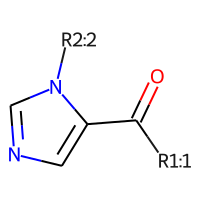
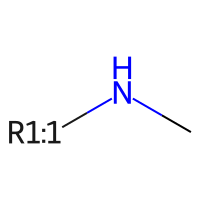
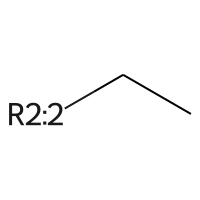
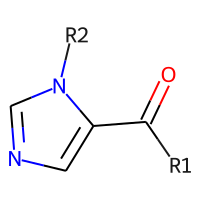
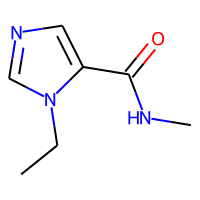
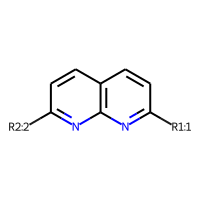
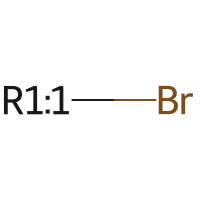
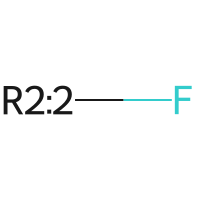
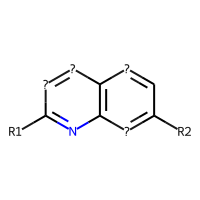
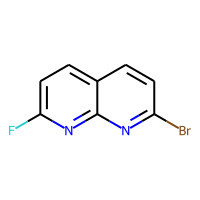

In [18]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, cores)

In [19]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:1])nc2nc1[*:2] R1:Br[*:1] R2:F[*:2]",


,Core,R1,R2,Input core,Mol
0,,,,,
1,,,,,

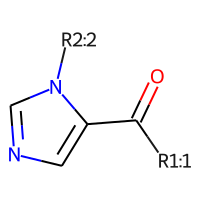
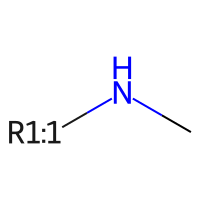
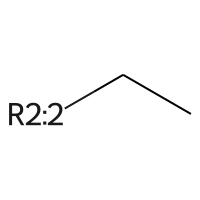
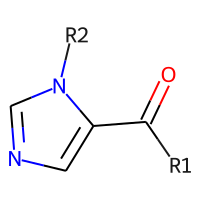
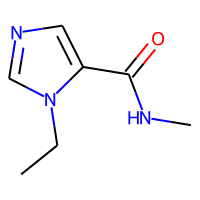
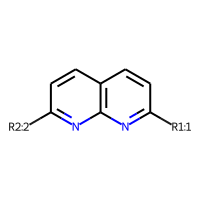
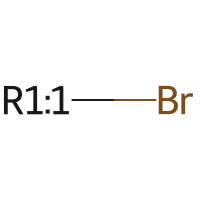
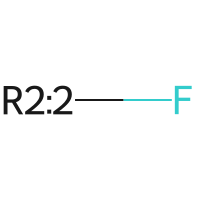
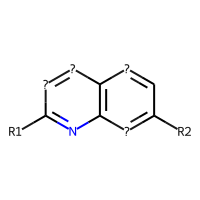
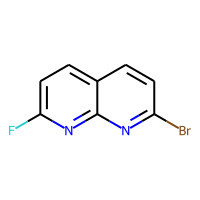

In [20]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.DummyAtomLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.MCS
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, cores)

In [21]:
print_rows(options)

"Core:O=C(c1cncn1[*:2])[*:1] R1:CN[*:1] R2:CC[*:2]",
"Core:c1cc2ccc([*:1])nc2nc1[*:2] R1:Br[*:1] R2:F[*:2]",


### testMatchOnAnyAtom

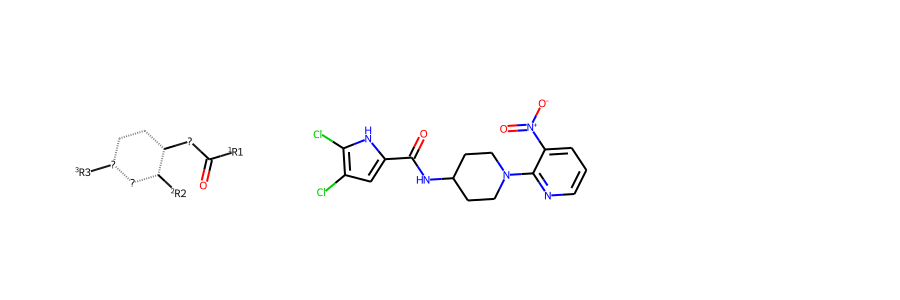

In [22]:
block="""
  Mrv2008 01192109352D          

 12 12  0  0  0  0            999 V2000
    3.7389   -3.2028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5640   -3.2028    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.9764   -2.4884    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    4.5640   -1.7739    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7389   -1.7739    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3265   -2.4884    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5015   -2.4884    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    3.3265   -3.9172    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    5.8014   -2.4884    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    2.0890   -1.7739    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5015   -1.0595    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2640   -1.7739    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  5  6  8  0  0  0  0
  4  5  8  0  0  0  0
  3  4  8  0  0  0  0
  2  3  8  0  0  0  0
  1  2  8  0  0  0  0
  1  6  8  0  0  0  0
  6  7  1  0  0  0  0
  1  8  1  0  0  0  0
  3  9  1  0  0  0  0
  7 10  1  0  0  0  0
 10 11  2  0  0  0  0
 10 12  1  0  0  0  0
M  RGP  3   8   2   9   3  12   1
M  END
"""
core=Chem.MolFromMolBlock(block)
AllChem.Compute2DCoords(core)
smiles = 'O=C(NC1CCN(c2ncccc2[N+](=O)[O-])CC1)c1cc(Cl)c(Cl)[nH]1'
cores = [core]
mols = [Chem.MolFromSmiles(smiles)]
Draw.MolsToGridImage([cores[0], mols[0]], subImgSize=(300, 300))

,Core,R1,R3,Input core,Mol
0,,,,,

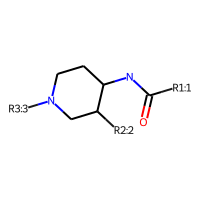
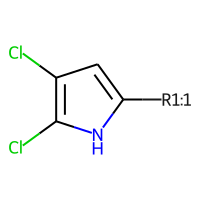
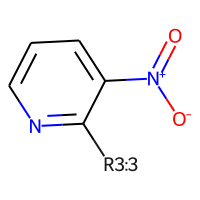
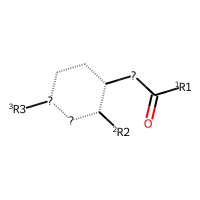
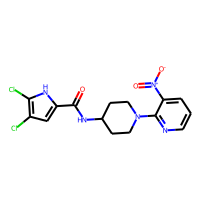

In [23]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = False
cols=decomp(options)
show_decomp(cols, core)

In [24]:
print_rows(options)

"Core:O=C(NC1CCN([*:3])CC1[*:2])[*:1] R1:Clc1cc([*:1])[nH]c1Cl R3:O=[N+]([O-])c1cccnc1[*:3]",


,Core,R1,R3,Input core,Mol
0,,,,,

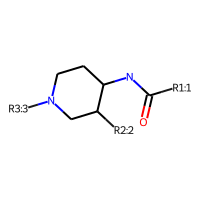
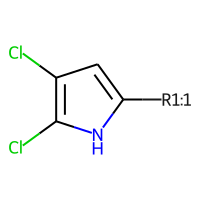
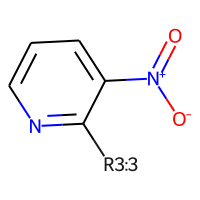
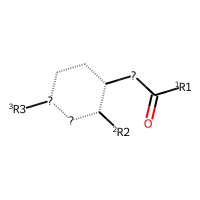
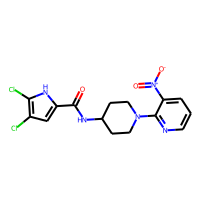

In [25]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, core)

In [26]:
print_rows(options)

"Core:O=C(NC1CCN([*:3])CC1[*:2])[*:1] R1:Clc1cc([*:1])[nH]c1Cl R3:O=[N+]([O-])c1cccnc1[*:3]",


### testRingMatching3

The decomposition is good, but the Core depiction is not Kekulized.  The default scoring function does not arrange the R groups correctly. 

,Core,R1,R2,Input core,Mol
0,,,,,
1,,,,,
2,,,,,

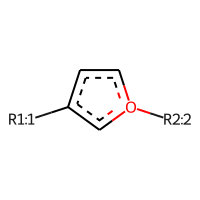
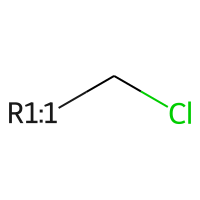
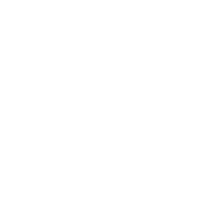
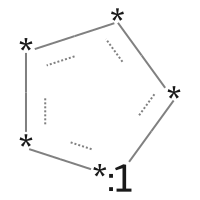
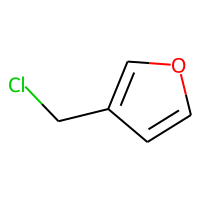
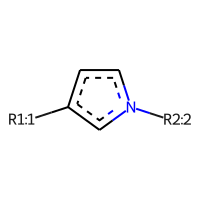
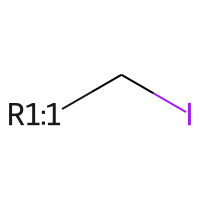
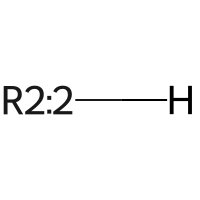
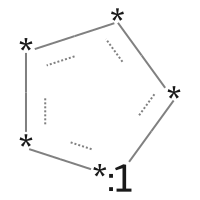
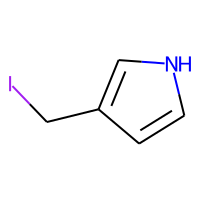
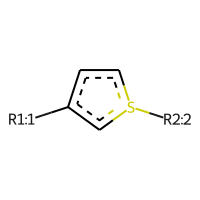
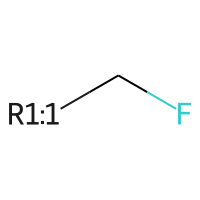
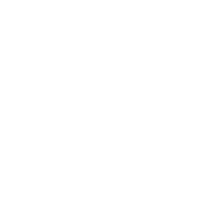
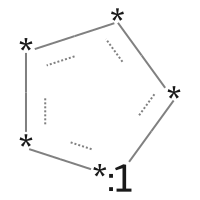
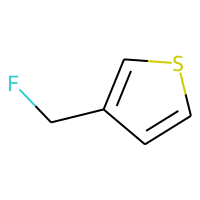

In [27]:
cores = [Chem.MolFromSmarts("*1***[*:1]1")]
#cores = [Chem.MolFromSmarts("*1****1")]
smi = ["c1cocc1CCl", "c1c[nH]cc1CI", "c1cscc1CF"]
mols = [Chem.MolFromSmiles(s) for s in smi]
options = RGroupDecompositionParameters()
options.scoreMethod = RGroupScore.FingerprintVariance
options.onlyMatchAtRGroups = False
cols=decomp(options)
show_decomp(cols, cores[0])

In [28]:
print_rows(options)

"Core:c1co([*:2])cc1[*:1] R1:ClC[*:1]",
"Core:c1cn([*:2])cc1[*:1] R1:IC[*:1] R2:[H][*:2]",
"Core:c1cs([*:2])cc1[*:1] R1:FC[*:1]",


### testGithub3402

,Core,R1,Input core,Mol
0,,,,

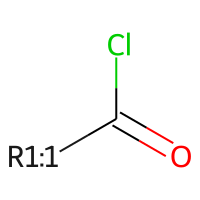
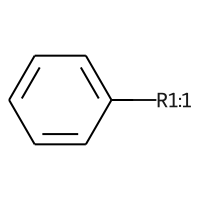
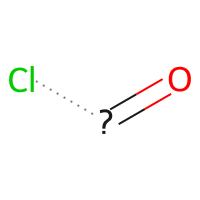
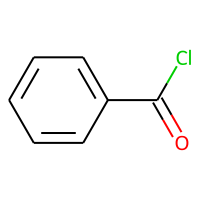

In [29]:
cores = [Chem.MolFromSmarts("[$(C-!@[a])](=O)(Cl)")]
mols = [Chem.MolFromSmiles("c1ccccc1C(=O)Cl")]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols, cores[0])
        

In [30]:
print_rows(options)

"Core:O=C(Cl)[*:1] R1:c1ccc([*:1])cc1",


### singleAtomBridge

This test is currently broken.  It is clear from the core and molecule what the decomposition should be.

,Core,R1,Input core,Mol
0,,,,

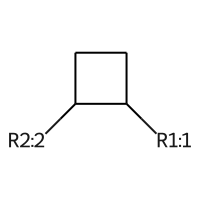
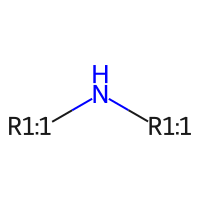
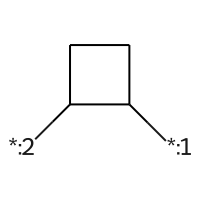
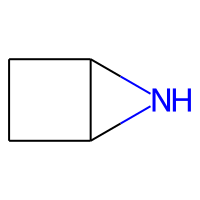

In [31]:
mols = [Chem.MolFromSmiles('C1CC2NC12')]
cores = [Chem.MolFromSmiles('C1([*:1])C([*:2])CC1')]
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, cores[0])


In [32]:
print_rows(options)

"Core:C1CC([*:2])C1[*:1] R1:N([*:1])[*:1]",


,Core,R1,Input core,Mol
0,,,,

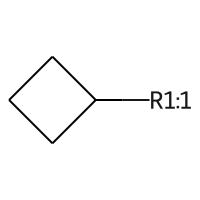
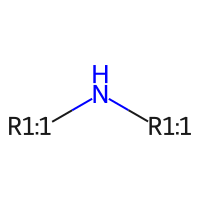
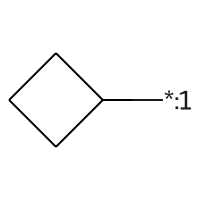
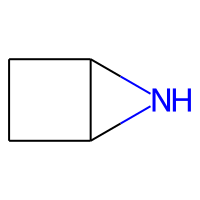

In [33]:
mols = [Chem.MolFromSmiles('C1CC2NC12')]
cores = [Chem.MolFromSmiles('C1([*:1])CCC1')]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols, cores[0])

In [34]:
print_rows(options)

"Core:C1CC([*:1])C1 R1:N([*:1])[*:1]",


### testRingMatching

The decomposition is good, but the Core depiction for the third structure is not Kekulized.

RDKit ERROR: [21:06:41] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


,Core,R1,Input core,Mol
0,,,,
1,,,,
2,,,,

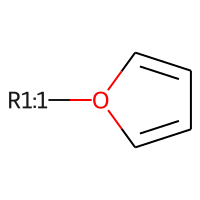
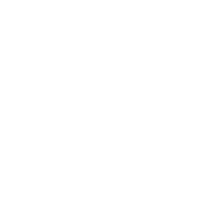
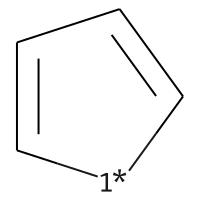
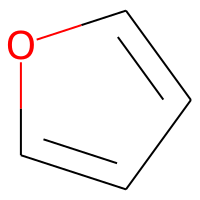
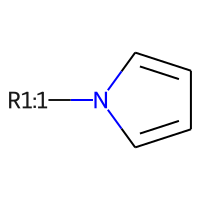
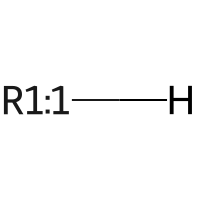
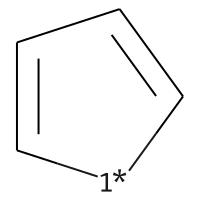
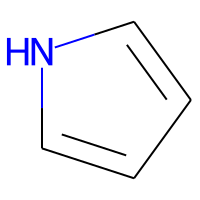
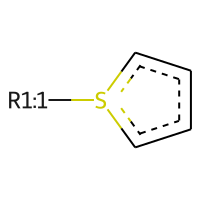
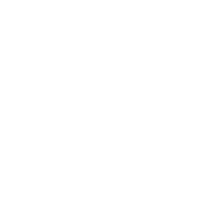
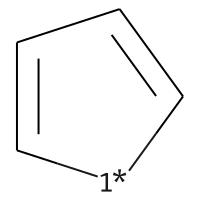
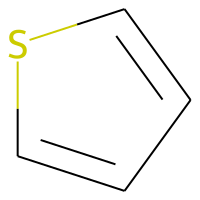

In [35]:
cores = [Chem.MolFromSmiles("c1ccc[1*]1")]
smi = ["c1cocc1", "c1c[nH]cc1", "c1cscc1"]
mols = [Chem.MolFromSmiles(s) for s in smi]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols, cores[0])

In [36]:
print_rows(options)

"Core:c1cco([*:1])c1",
"Core:c1ccn([*:1])c1 R1:[H][*:1]",
"Core:c1ccs([*:1])c1",


### testRingMatching2

The decomposition is good, but the Core depiction is not Kekulized.

,Core,R2,R3,Input core,Mol
0,,,,,
1,,,,,
2,,,,,

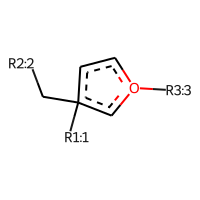
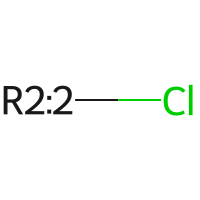
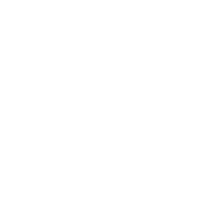
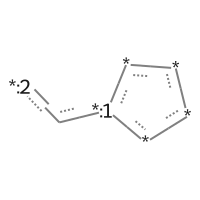
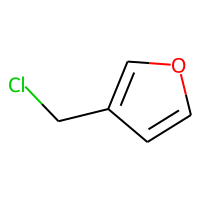
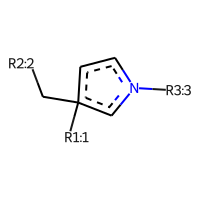
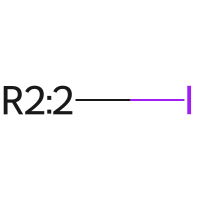
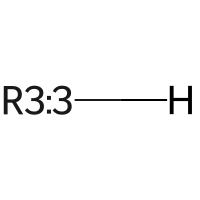
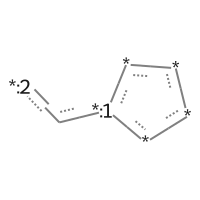
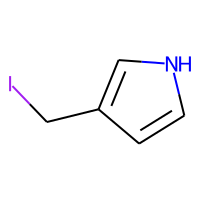
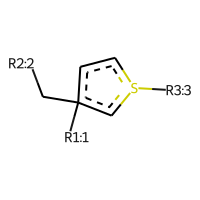
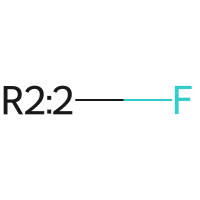
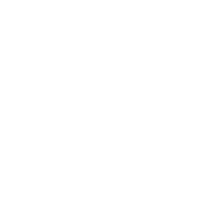
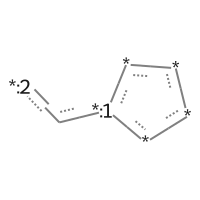
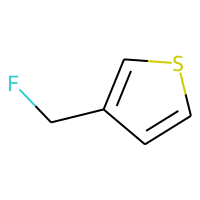

In [37]:
cores = [Chem.MolFromSmarts("*1***[*:1]1C[*:2]")]
smi = ["c1cocc1CCl", "c1c[nH]cc1CI", "c1cscc1CF"]
mols = [Chem.MolFromSmiles(s) for s in smi]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols, cores[0])

In [38]:
print_rows(options)

"Core:c1cc(C[*:2])([*:1])co1[*:3] R2:Cl[*:2]",
"Core:c1cc(C[*:2])([*:1])cn1[*:3] R2:I[*:2] R3:[H][*:3]",
"Core:c1cc(C[*:2])([*:1])cs1[*:3] R2:F[*:2]",


### testCoreWithRGroupAdjQuery

,Core,R1,R2,Input core,Mol
0,,,,,

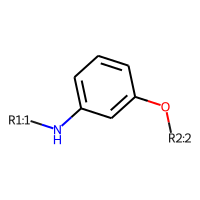
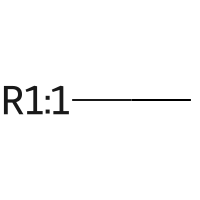
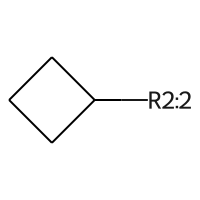
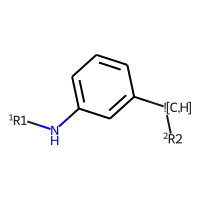
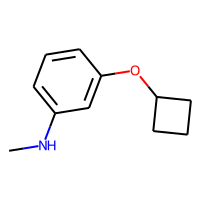

In [39]:
block = """
     RDKit          2D

 10 10  0  0  0  0  0  0  0  0999 V2000
   -3.6689   -0.8582    0.0000 R#  0  0  0  0  0  1  0  0  0  0  0  0
   -2.2421   -1.3211    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1279   -0.3169    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4403    1.1502    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3261    2.1543    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1007    1.6914    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4132    0.2243    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2989   -0.7798    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8400   -0.2386    0.0000 Q   0  0  0  0  0  0  0  0  0  0  0  0
    3.1525   -1.7057    0.0000 R#  0  0  0  0  0  1  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  7  1  0
  7  8  2  0
  7  9  1  0
  9 10  1  0
  8  3  1  0
M  RGP  2   1   1  10   2
M  END
$$$$
"""

core=Chem.MolFromMolBlock(block)
AllChem.Compute2DCoords(core)
smiles = 'CNc1cccc(c1)OC1CCC1'
cores = [core]
mols = [Chem.MolFromSmiles(smiles)]
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = True
cols=decomp(options)
show_decomp(cols, cores[0])

In [40]:
print_rows(options)

"Core:c1cc(N[*:1])cc(O[*:2])c1 R1:C[*:1] R2:C1CC([*:2])C1",


### test_userLabels

,Core,R1,R5,R6,Input core,Mol
0,,,,,,

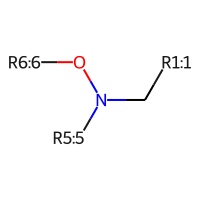
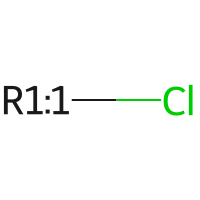
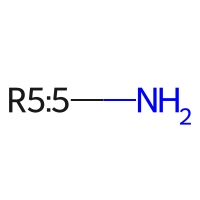
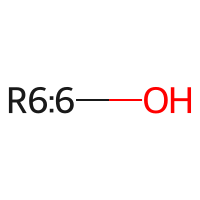
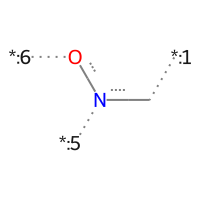
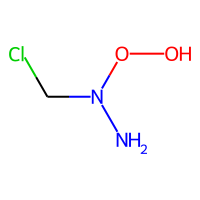

In [41]:
smi = "C(Cl)N(N)O(O)"
mols = [Chem.MolFromSmiles(smi)]
smarts = 'C([*:1])N([*:5])O([*:6])'
cores = [Chem.MolFromSmarts(smarts)]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols, cores[0])

In [42]:
print_rows(options)

"Core:C(N(O[*:6])[*:5])[*:1] R1:Cl[*:1] R5:N[*:5] R6:O[*:6]",


,Core,R4,R5,R6,Input core,Mol
0,,,,,,

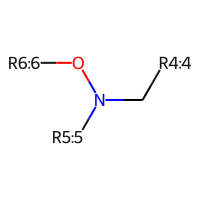
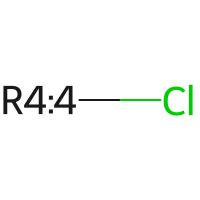
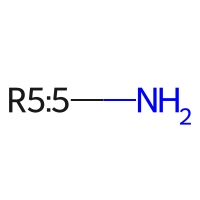
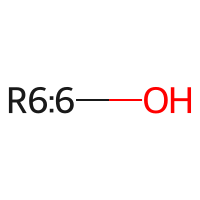
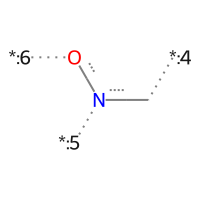
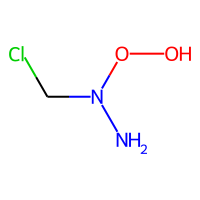

In [43]:
smarts = 'C([*:4])N([*:5])O([*:6])'
cores = [Chem.MolFromSmarts(smarts)]
options = RGroupDecompositionParameters()
cols=decomp(options)
show_decomp(cols, cores[0])

In [44]:
print_rows(options)

"Core:C(N(O[*:6])[*:5])[*:4] R4:Cl[*:4] R5:N[*:5] R6:O[*:6]",


### testGeminalRGroups

,Core,R5,R6,Input core,Mol
0,,,,,
1,,,,,
2,,,,,

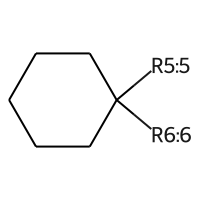
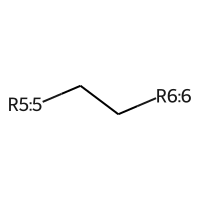
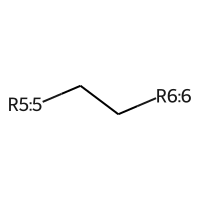
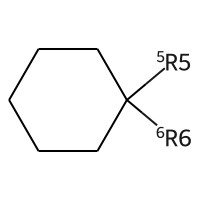
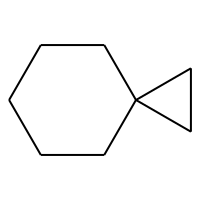
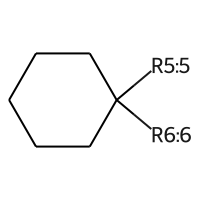
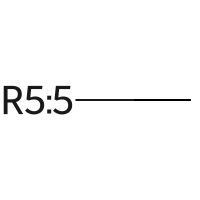
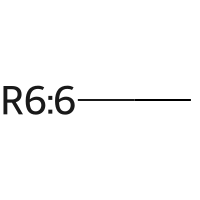
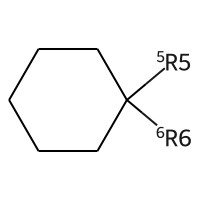
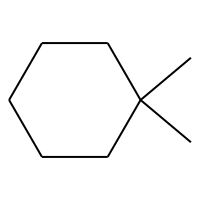
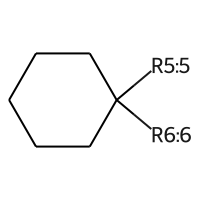
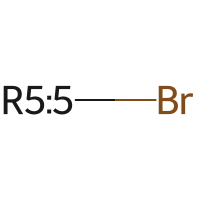
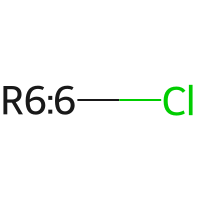
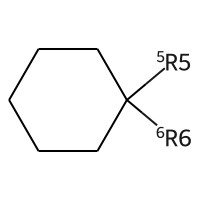
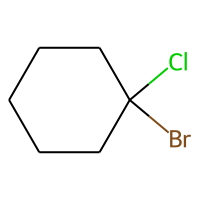

In [45]:
block="""
     RDKit          2D

  8  8  0  0  0  0  0  0  0  0999 V2000
   -0.6026    1.2267    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3171    0.8142    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3171   -0.0108    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6026   -0.4232    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1118   -0.0108    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1118    0.8142    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0714    1.7839    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -0.0506    1.8398    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  1  2  1  0  0  0  0
  1  6  1  0  0  0  0
  1  7  1  0  0  0  0
  1  8  1  0  0  0  0
M  RGP  2   7   5   8   6
M  END
"""

core=Chem.MolFromMolBlock(block)
AllChem.Compute2DCoords(core)
smi = ["C1CCCCC12CC2", "C1CCCCC1(C)C", "C1CCCCC1(Cl)Br"]
cores = [core]
mols = [Chem.MolFromSmiles(s) for s in smi]
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = True
options.scoreMethod = RGroupScore.FingerprintVariance
cols=decomp(options)
show_decomp(cols, cores[0])


In [46]:
print_rows(options)

"Core:C1CCC([*:5])([*:6])CC1 R5:C(C[*:6])[*:5] R6:C(C[*:6])[*:5]",
"Core:C1CCC([*:5])([*:6])CC1 R5:C[*:5] R6:C[*:6]",
"Core:C1CCC([*:5])([*:6])CC1 R5:Br[*:5] R6:Cl[*:6]",


### testUserMatchTypes

,Core,R1,R2,Input core,Mol
0,,,,,

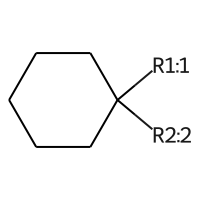
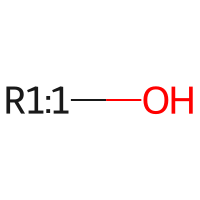
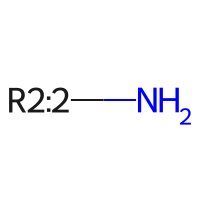
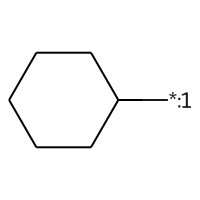
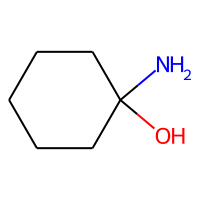

In [54]:
cores = [Chem.MolFromSmiles('C1CCCCC1[*:1]')]
mols =  [Chem.MolFromSmiles('C1CCCCC1(N)(O)')]
options = RGroupDecompositionParameters()
options.scoreMethod = RGroupScore.FingerprintVariance
options.onlyMatchAtRGroups = False
cols=decomp(options)
show_decomp(cols, cores[0])

In [48]:
print_rows(options)

"Core:C1CCC([*:1])([*:2])CC1 R1:O[*:1] R2:N[*:2]",


,Core,R1,R2,Input core,Mol
0,,,,,

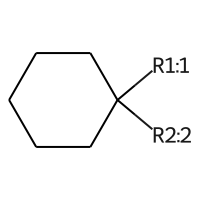
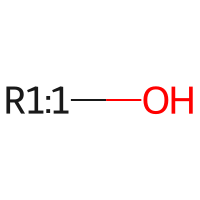
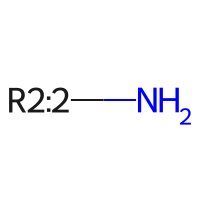
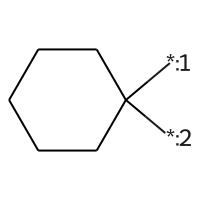
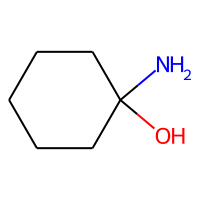

In [49]:
cores = [Chem.MolFromSmiles('C1CCCCC1([*:1])([*:2])')]
options = RGroupDecompositionParameters()
options.scoreMethod = RGroupScore.FingerprintVariance
options.onlyMatchAtRGroups = False
cols=decomp(options)
show_decomp(cols, cores[0])

In [50]:
print_rows(options)

"Core:C1CCC([*:1])([*:2])CC1 R1:O[*:1] R2:N[*:2]",


,Core,R1,R2,Input core,Mol
0,,,,,

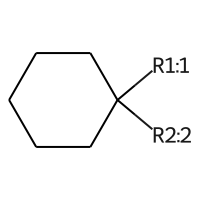
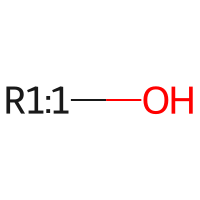
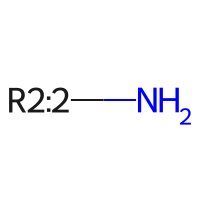
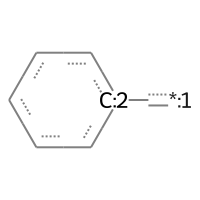
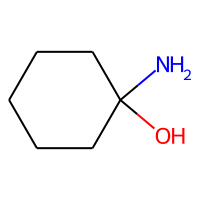

In [51]:
cores = [Chem.MolFromSmarts('C1CCCC[C:2]1[*:1]')]
options = RGroupDecompositionParameters()
options.scoreMethod = RGroupScore.FingerprintVariance
options.onlyMatchAtRGroups = False
cols=decomp(options)
show_decomp(cols, cores[0])

In [52]:
print_rows(options)

"Core:C1CCC([*:1])([*:2])CC1 R1:O[*:1] R2:N[*:2]",
